<a href="https://colab.research.google.com/github/Virzlauvinen/proyecto_Empleados/blob/main/PPT_Vir_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CLASIFICACIÓN DE LA ECONOMÍA LABORAL**
Dentro de la economía laboral surgen problemas que podrían ser analizados con herramientas extraídas del Machine Learning. En el presente trabajo nos enfrentamos a un problema de economía laboral donde buscaremos la clasificación de individuos en dos grupos sujetos a una serie de variables.

El **objetivo** es la creación de algoritmos de clasificación que logren **categorizar a un grupo de individuos en empleado o desempleado**. Para esto haremos uso de un set de datos con 25424 observaciones y 12 variables con información relevante. La columna principal empleado toma el valor de 0 para individuos que no tienen empleo y 1 para los que si, el resto de columnas hace referencia a características propias de cada individuo.

La fuente principal de los datos es la Gran Encuesta de Hogares (GEIH) del DANE para el año 2019. Estos fueron construidos por medio del merge de distintas tablas de la encuesta.



#**ETAPA 1: OBTENCIÓN DEL DATA SET**

In [1]:
#Vincula Colab con Drive (monta el Drive en la máquina virtual que nos provee Google)
from google.colab import drive

drive.mount('/content/DRIVE')

Mounted at /content/DRIVE


In [2]:
#Importo librerias
import pandas as pd
import numpy as np

In [3]:
#Lee el csv y lo convierte a un df de pandas
path = '/content/DRIVE/MyDrive/2 - CDIA/CDIA/PPT2/train.csv'
dataset_crudo = pd.read_csv(path)
dataset_crudo

,id,empleado,sexo,edad,años_edc,pareja,estudiante_act,estrato,pc,internet,etnia,padres_reside
0,12937,0,1,40.0,10.0,1,No,2,1,1,sin_rec_etnico,ninguno
1,27786,0,0,52.0,8.0,0,No,2,1,1,sin_rec_etnico,ninguno
2,6326,1,1,40.0,16.0,1,No,3,1,1,sin_rec_etnico,ninguno
3,36084,0,1,20.0,11.0,0,No,2,1,0,sin_rec_etnico,ninguno
4,19146,1,0,43.0,16.0,0,No,2,0,1,sin_rec_etnico,ninguno
...,...,...,...,...,...,...,...,...,...,...,...,...
25419,17369,1,0,30.0,12.0,0,No,3,0,1,sin_rec_etnico,ninguno
25420,28788,0,1,20.0,11.0,0,No,3,0,1,sin_rec_etnico,madre
25421,10879,1,1,34.0,17.0,1,No,3,1,1,sin_rec_etnico,ninguno
25422,26695,0,1,48.0,5.0,0,No,2,0,0,sin_rec_etnico,ninguno


# **ETAPA 2: DATA CLEANING**

Se realizaron transformaciones sobre las variables, debido a  que estos presentan algunos errores naturales en el proceso de minado de datos (Missing values, duplicados etc.)



In [4]:
#1)Primero analizo los null
#Total de null de todos los campos (1,23% de la base son null )
dataset_crudo.isnull().sum().sum()

314

In [5]:
#Total de null por campo
dataset_crudo.isnull().sum()

id                  0
empleado            0
sexo                0
edad               49
años_edc          110
pareja              0
estudiante_act      0
estrato             0
pc                  0
internet            0
etnia             155
padres_reside       0
dtype: int64

In [6]:
dataset_crudo.isna().sum()

id                  0
empleado            0
sexo                0
edad               49
años_edc          110
pareja              0
estudiante_act      0
estrato             0
pc                  0
internet            0
etnia             155
padres_reside       0
dtype: int64

In [7]:
#Resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores NaN.

dataset_crudo.describe()

,id,empleado,edad,años_edc,pareja,estrato,pc,internet
count,25424.000000,25424.000000,25375.000000,25314.000000,25424.000000,25424.000000,25424.000000,25424.000000
mean,18141.339797,0.500433,37.095567,11.605001,0.455160,2.407292,0.520178,0.747915
std,10510.596370,0.500010,13.508600,3.970536,0.497995,0.902201,0.499603,0.434218
min,0.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,9043.750000,0.000000,26.000000,11.000000,0.000000,2.000000,0.000000,0.000000
50%,18171.500000,1.000000,35.000000,11.000000,0.000000,2.000000,1.000000,1.000000
75%,27242.250000,1.000000,47.000000,14.000000,1.000000,3.000000,1.000000,1.000000
max,36319.000000,1.000000,99.000000,26.000000,1.000000,6.000000,1.000000,1.000000


In [8]:
# Se elimina el id porque no es significativo (No es significativo a la hr de entrenar el modelo)
dataset_crudo = dataset_crudo.drop(columns='id')


In [9]:
#Reemplazamos los nulos en edad por la media
media_edad=dataset_crudo.edad.mean()
dataset_crudo["edad"] = dataset_crudo["edad"].fillna(media_edad)

In [10]:
#Otra vez isnull para ver que efectivamente fueron reemplazados
dataset_crudo.isnull().sum()

empleado            0
sexo                0
edad                0
años_edc          110
pareja              0
estudiante_act      0
estrato             0
pc                  0
internet            0
etnia             155
padres_reside       0
dtype: int64

In [11]:
#Reemplazmos los años_edc por su media
años_media = dataset_crudo.años_edc.mean()
dataset_crudo.años_edc = dataset_crudo.años_edc.fillna(años_media)
#vemos la info para ver si fue reemplazada y ya no es null
dataset_crudo.isnull().sum()

empleado            0
sexo                0
edad                0
años_edc            0
pareja              0
estudiante_act      0
estrato             0
pc                  0
internet            0
etnia             155
padres_reside       0
dtype: int64

In [12]:
#Hacemos lo mismo para etnia solo que lo reemplazamos por "sin_rec_etnico"
sin_etnia = "sin_rec_etnico"
dataset_crudo.etnia = dataset_crudo.etnia.fillna(sin_etnia)
#verificamos
dataset_crudo.isnull().sum()

empleado          0
sexo              0
edad              0
años_edc          0
pareja            0
estudiante_act    0
estrato           0
pc                0
internet          0
etnia             0
padres_reside     0
dtype: int64

In [13]:
# importante saber el Dtype de cada columna para normalizar 
#Los datos de tipo  Object (1 Sexo, 5 Estudiante act, 9 Etnia, 10 Padres_reside) los pasamos a Numericos...
dataset_crudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25424 entries, 0 to 25423
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   empleado        25424 non-null  int64  
 1   sexo            25424 non-null  object 
 2   edad            25424 non-null  float64
 3   años_edc        25424 non-null  float64
 4   pareja          25424 non-null  int64  
 5   estudiante_act  25424 non-null  object 
 6   estrato         25424 non-null  int64  
 7   pc              25424 non-null  int64  
 8   internet        25424 non-null  int64  
 9   etnia           25424 non-null  object 
 10  padres_reside   25424 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 2.1+ MB


In [14]:
#Devuelve la cantidad de valores unicos por campo de df
dataset_crudo.nunique(axis=0)

empleado           2
sexo               6
edad              79
años_edc          28
pareja             2
estudiante_act     5
estrato            6
pc                 2
internet           2
etnia              4
padres_reside      4
dtype: int64

In [15]:
#ETNIA
#Devuelve los valores unico de un campo 
print('Etnia = {}'.format(dataset_crudo.etnia.unique()))

Etnia = ['sin_rec_etnico' 'indigena' 'Afro' 'gitano']


In [16]:
type(dataset_crudo.etnia)
#Devuelve cuales son los valores unico de un campo
dataset_crudo.etnia.unique()


array(['sin_rec_etnico', 'indigena', 'Afro', 'gitano'], dtype=object)

In [17]:
#SEXO
print(dataset_crudo.sexo.unique())

['1' '0' 'HOMBRE' 'MUJER' 'Hombre' 'Mujer']


In [18]:
#Contamos los valores unicos (Para ver cual es el que predomina)
print(dataset_crudo["sexo"].value_counts())

0         13298
1         11888
MUJER        95
HOMBRE       70
Hombre       40
Mujer        33
Name: sexo, dtype: int64


In [19]:
#Normalizo string
dataset_crudo.sexo = dataset_crudo.sexo.replace(['Mujer'], 'MUJER')
dataset_crudo.sexo =dataset_crudo.sexo.replace(['Hombre'], 'HOMBRE')
#Vuelvo a ver como quedo
dataset_crudo.sexo.unique()

array(['1', '0', 'HOMBRE', 'MUJER'], dtype=object)

In [20]:
#Reemplazamos a Mujer=0 Hombre=1

#PROBLEMA 1 QUE SE PRESENTA ---> Como definimos que 0=mujer y 1=hombre? 
dataset_crudo.sexo = dataset_crudo.sexo.replace(['MUJER'], 0)
dataset_crudo.sexo = dataset_crudo.sexo.replace(['HOMBRE'], 1)
dataset_crudo.sexo = dataset_crudo.sexo.replace(['0'], 0)
dataset_crudo.sexo = dataset_crudo.sexo.replace(['1'], 0)
#Vuelvo a ver como quedo
dataset_crudo.sexo.unique()

array([0, 1])

In [21]:
#ESTUDIANTE
dataset_crudo.estudiante_act.unique()

array(['No', 'Si', 'SI', 'SIPI', 'NO'], dtype=object)

In [22]:
dataset_crudo.estudiante_act = dataset_crudo.estudiante_act.replace(['No', 'NO'], 0)
dataset_crudo.estudiante_act = dataset_crudo.estudiante_act.replace(['Si', 'SI', 'SIPI'], 1)
dataset_crudo.estudiante_act.unique()

array([0, 1])

In [23]:
#PADRE RESIDE
dataset_crudo.nunique(axis=0)
dataset_crudo.padres_reside.unique()

array(['ninguno', 'padre y madre', 'madre', 'padre'], dtype=object)

In [24]:
#ESTRATO
dataset_crudo.estrato.unique()

array([2, 3, 4, 1, 5, 6])

In [25]:
dataset_crudo.nunique(axis=0)

empleado           2
sexo               2
edad              79
años_edc          28
pareja             2
estudiante_act     2
estrato            6
pc                 2
internet           2
etnia              4
padres_reside      4
dtype: int64

In [26]:
dataset_crudo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25424 entries, 0 to 25423
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   empleado        25424 non-null  int64  
 1   sexo            25424 non-null  int64  
 2   edad            25424 non-null  float64
 3   años_edc        25424 non-null  float64
 4   pareja          25424 non-null  int64  
 5   estudiante_act  25424 non-null  int64  
 6   estrato         25424 non-null  int64  
 7   pc              25424 non-null  int64  
 8   internet        25424 non-null  int64  
 9   etnia           25424 non-null  object 
 10  padres_reside   25424 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 2.1+ MB


In [27]:
dataset_curado = dataset_crudo


In [28]:
#Guarda el DF CURADO en un archivo csv
dataset_curado.to_csv('/content/DRIVE/MyDrive/2 - CDIA/CDIA/PPT2/dataset_curado_1', index=False)

In [29]:
#get_dummies convierte la variable categórica en variables ficticias/indicadoras (por cada categoria agrega una columna).
dataset_curado_2 = pd.get_dummies(dataset_curado, columns=['padres_reside'])
dataset_curado_2

,empleado,sexo,edad,años_edc,pareja,estudiante_act,estrato,pc,internet,etnia,padres_reside_madre,padres_reside_ninguno,padres_reside_padre,padres_reside_padre y madre
0,0,0,40.0,10.0,1,0,2,1,1,sin_rec_etnico,0,1,0,0
1,0,0,52.0,8.0,0,0,2,1,1,sin_rec_etnico,0,1,0,0
2,1,0,40.0,16.0,1,0,3,1,1,sin_rec_etnico,0,1,0,0
3,0,0,20.0,11.0,0,0,2,1,0,sin_rec_etnico,0,1,0,0
4,1,0,43.0,16.0,0,0,2,0,1,sin_rec_etnico,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25419,1,0,30.0,12.0,0,0,3,0,1,sin_rec_etnico,0,1,0,0
25420,0,0,20.0,11.0,0,0,3,0,1,sin_rec_etnico,1,0,0,0
25421,1,0,34.0,17.0,1,0,3,1,1,sin_rec_etnico,0,1,0,0
25422,0,0,48.0,5.0,0,0,2,0,0,sin_rec_etnico,0,1,0,0


In [30]:
dataset_curado_2= pd.get_dummies(dataset_curado_2 , columns=['etnia'])
dataset_curado_2

,empleado,sexo,edad,años_edc,pareja,estudiante_act,estrato,pc,internet,padres_reside_madre,padres_reside_ninguno,padres_reside_padre,padres_reside_padre y madre,etnia_Afro,etnia_gitano,etnia_indigena,etnia_sin_rec_etnico
0,0,0,40.0,10.0,1,0,2,1,1,0,1,0,0,0,0,0,1
1,0,0,52.0,8.0,0,0,2,1,1,0,1,0,0,0,0,0,1
2,1,0,40.0,16.0,1,0,3,1,1,0,1,0,0,0,0,0,1
3,0,0,20.0,11.0,0,0,2,1,0,0,1,0,0,0,0,0,1
4,1,0,43.0,16.0,0,0,2,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25419,1,0,30.0,12.0,0,0,3,0,1,0,1,0,0,0,0,0,1
25420,0,0,20.0,11.0,0,0,3,0,1,1,0,0,0,0,0,0,1
25421,1,0,34.0,17.0,1,0,3,1,1,0,1,0,0,0,0,0,1
25422,0,0,48.0,5.0,0,0,2,0,0,0,1,0,0,0,0,0,1


In [31]:
dataset_curado_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25424 entries, 0 to 25423
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   empleado                     25424 non-null  int64  
 1   sexo                         25424 non-null  int64  
 2   edad                         25424 non-null  float64
 3   años_edc                     25424 non-null  float64
 4   pareja                       25424 non-null  int64  
 5   estudiante_act               25424 non-null  int64  
 6   estrato                      25424 non-null  int64  
 7   pc                           25424 non-null  int64  
 8   internet                     25424 non-null  int64  
 9   padres_reside_madre          25424 non-null  uint8  
 10  padres_reside_ninguno        25424 non-null  uint8  
 11  padres_reside_padre          25424 non-null  uint8  
 12  padres_reside_padre y madre  25424 non-null  uint8  
 13  etnia_Afro      

In [32]:
#Guarda el DF CURADO en un archivo csv
dataset_curado_2.to_csv('/content/DRIVE/MyDrive/2 - CDIA/CDIA/PPT2/dataset_curado_2', index=False)

#**ETAPA 4 y 5: DESARROLLO DE MODELOS Y METRICAS**

Entendiendo que estamos tratando de resolver un problema de clasificacion desarollaremos los siguientes modelos especificos para este tipo de problema:

- Regresion Logistica.
- Maquina soporte Vector (SVM)
- Arbol de desición con Random Forest.

Mediremos el desempeño de cada modelo por medio de:
- La métrica accuracy: la cual determina el numero de observaciones clasificadas correctamente. Esta métrica se aplica a los resultados que genera la aplicación del algoritmo sobre el grupo de testeo *
- Matriz de confusion.

*El calculo del accuracy sobre solo el set de testeo se debe a que en el desarrolo de los modelos SVM y Arbol de desicion mas random forest se aplicó la tecnica de validacion cruzada la cual puede solventar el problema de overfitting.



#**REGRESION LOGISTICA (RL)**

In [33]:
#Librerías para normalización, regresión Logística y métricas de precisión
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [34]:
#Dividimos los datos
dataset_curado_RL = dataset_curado_2
input = dataset_curado_RL.drop(columns='empleado')
target = dataset_curado_RL['empleado']
Datos_train, Datos_test, Target_train, Target_test = train_test_split (input, target, test_size= 0.2, random_state=42)

In [35]:
#Vemos como quedaron divididos los datos
print("Datos_train:", Datos_train.shape)
print("Datos_test:",Datos_test.shape)
print("input:",input.shape)
print()
print("Target_train:",Target_train.shape)
print("Target_test:",Target_test.shape)
print("target:",target.shape)

Datos_train: (20339, 16)
Datos_test: (5085, 16)
input: (25424, 16)

Target_train: (20339,)
Target_test: (5085,)
target: (25424,)


In [36]:
#Normalizamos el dataset
min_max_scaler = preprocessing.MinMaxScaler()
Datos_train_normalizado = min_max_scaler.fit_transform(Datos_train)
Datos_test_normalizado = min_max_scaler.fit_transform(Datos_test)

In [37]:
Datos_train_normalizado

array([[0.        , 0.40229885, 0.11538462, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.25287356, 0.65384615, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.56321839, 0.30769231, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.1954023 , 0.42307692, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.37931034, 0.19230769, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.3908046 , 0.42307692, ..., 0.        , 0.        ,
        1.        ]])

In [38]:
#Entrenamos el modelo
reglog=LogisticRegression()
#Debimos aumentar el máximo de iteraciones porque la librería indicaba que faltaban iteraciones para la convergencia
reglog.max_iter=130
reglog.fit(Datos_train_normalizado, Target_train)

LogisticRegression(max_iter=130)

In [39]:
#Hacemos la predicción sobre los datos de testeo
pred= reglog.predict(Datos_test_normalizado)

In [40]:
#Los coeficientes me indican la importancia de las columnas al resultado
importance = reglog.coef_[0]

In [41]:
importance

array([ 0.53653088,  1.69609583,  0.3137237 ,  0.42651508,  0.15077365,
        1.30577166,  0.38028471,  0.31866652, -0.04722964,  0.1811699 ,
       -0.08980845, -0.07445286,  0.18157046,  0.4215776 ,  0.07453423,
       -0.70800334])

##**Metricas de RL**

In [42]:
#Verificamos que tan acertada fue la respuesta del modelo
accuracy=accuracy_score(Target_test, pred)
accuracy

0.631661750245821

In [43]:
#Imprimimos la matriz de confusión
conf = confusion_matrix(Target_test, pred)
conf

array([[1672,  906],
       [ 967, 1540]])

In [44]:
#Imprimimos más métricas de evaluación
target_names = ['empleado', 'no empleado']
print(classification_report(Target_test, pred, target_names=target_names))

              precision    recall  f1-score   support

    empleado       0.63      0.65      0.64      2578
 no empleado       0.63      0.61      0.62      2507

    accuracy                           0.63      5085
   macro avg       0.63      0.63      0.63      5085
weighted avg       0.63      0.63      0.63      5085



##**Conclusión RL**
El modelo puede explicar el 63% de los datos.

En referencia a su matriz de confusión si bien su diagonal principal esta marcada, vemos que tiene alta cantidad de casos tanto  los falsos positivos como con los falsos negativos, un poco mayor esta cantidad en los falsos positivos.*

*Veremos mas adelante que esta tendencia se repite en los distintos modelos.

#**MÁQUINA SOPORTE VECTOR (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
dataset_curado_SVM = dataset_curado

In [ ]:
nput=dataset_curado_SVM.drop(columns=['empleado'])
target=np.array(dataset_curado_SVM['empleado'])

Datos_train, Datos_test, Target_train, Target_test = train_test_split (input, target, test_size= 0.2, random_state=42)
print("Datos de entrenamiento: " + str(Datos_train.shape))
print("Datos de testeo: " + str(Datos_test.shape))

Datos de entrenamiento: (20339, 16)
Datos de testeo: (5085, 16)


##**Busqueda en grilla de Hiperparametros**

Buscamos en grilla los mejores valores de los siguientes hiperparametros para SVM:

* C : Por default C es igual a 1. En caso de tener muchas observaciones ruidosas, se debe disminuir. La disminución de C corresponde a una mayor regularización.

In [ ]:
grilla_hiperparametros = {
    'support vector machine':{
        'model':SVC(),
        'params':{
            'C':[1, 0.75, 0.5, 0.25],
            'kernel':['linear']
        }
    }
}

score=[]

for model_name, mp in grilla_hiperparametros.items():

    clf = GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
    clf.fit(Datos_train, Target_train)

    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [ ]:
#Verificamos cual de los valores de los hiperparametros dio el mejor resultado
pd.DataFrame(score,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,support vector machine,0.625301,"{'C': 1, 'kernel': 'linear'}"


In [ ]:
#Entrenamos SVM con los hiperparametros mas optimos
svm_seleccionada=SVC(kernel='linear', C=1)
svm_seleccionada.fit(Datos_train, Target_train)
#Hacemos la prediccion sobre los datos de test
prediccion = svm_seleccionada.predict(Datos_test)

##**Metricas SVM**

In [ ]:
tp, fn, fp, tn = confusion_matrix(Target_test, prediccion).ravel()
print(" TP: " + str(tp) + "  |   FN: "+ str(fn))
print(" FP: " + str(fp) + "   |   TN: "+ str(tn))

 TP: 1724  |   FN: 854
 FP: 1044   |   TN: 1463


In [ ]:
#Obtenemos la precision del modelo
accuracy = accuracy_score(prediccion, Target_test)
print("Accuracy: " + str(accuracy))

Accuracy: 0.6267453294001967


In [ ]:
# SENSIBILIDAD:
Recall = tp / (fn +tp)
print("Recall: " + str(Recall))

Recall: 0.6687354538401862


In [ ]:
#ESPECIFICIDAD: 
Especificidad = tn / (tn +fp)
print("Especificidad: " + str(Especificidad))


Especificidad: 0.5835660151575588


##**¿Qué métrica elegir?**
La conveniencia de usar una métrica u otra como medida del estimador dependerá de cada caso en particular y, en concreto, del “coste” asociado a cada error de clasificación del algoritmo.
Si lo que nos interesa es identificar los verdaderos negativos, (evitar falsos positivos) debemos elegir especifidad alta.
Si lo que nos interesa es evitar falsos negativos, debemos elegir sensibilidad alta.

En este caso vemos que el modelo funciona mejor para evitar los falsos negativos, situacion de gran utilidad en caso que el modelo sea utilizado por un agente recaudador de impuestos. 

#**ARBOL DE DESICIÓN (DT)**

In [54]:
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
dataset_curado_KDD = dataset_curado_2

In [ ]:
#dataset_curado_KDD = dataset_curado_KDD.drop(columns=["etnia_sin_rec_etnico" ])

In [ ]:
##data_input['sexo'] = data_input['sexo'].astype(str).astype(float)

In [ ]:
#Dividimos los datos
input = dataset_curado_KDD.drop(columns='empleado')
target = dataset_curado_KDD['empleado']
Datos_train, Datos_test, Target_train, Target_test = train_test_split (input, target, test_size= 0.2, random_state=42)

In [ ]:
#Normalizamos el dataset 
min_max_scaler = preprocessing.MinMaxScaler()
Datos_train_normalizado = min_max_scaler.fit_transform(Datos_train)
Datos_test_normalizado = min_max_scaler.fit_transform(Datos_test)

##**Busqueda en Grilla de los mejores hiperparametros**


In [ ]:
#Generamos los parametros para hacer una busqueda en grilla del mejor modelo

model_params = {
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10, 25, 50],        #numero de arboles en el bosque
            'max_depth':[3, 5,10,50,100,150],             #profundidad maxima del arbol
            'min_samples_split':[10, 50],  #numero minimo de muestras requeridas para dividir un nodo interno
            'min_samples_leaf':[10, 50],   #numero minimo de muestras requeridas para estar en un nodo hoja
            'criterion':['gini', 'entropy']
        }
    },
  'decision tree':{
      'model':tree.DecisionTreeClassifier(),
      'params':{
          'max_depth':[3, 5,10,50,100,150],
          'min_samples_split':[10, 50],
          'min_samples_leaf':[10, 50],
          'criterion':['gini','entropy']
      }
  }
}

In [ ]:
#Hacemos la busqueda en grilla
score = []

for model_name, mp in model_params.items():

  clf=GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
  clf.fit(Datos_train_normalizado, Target_train)
  
  score.append({
      'model':model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

In [ ]:
#Vemos cuales fueron los mejores resultados de cada modelo y seleccionamos el mejor
df_score = pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])
df_score

,model,best_score,best_params
0,random_forest,0.681449,"{'criterion': 'entropy', 'max_depth': 50, 'min..."
1,decision tree,0.702296,"{'criterion': 'gini', 'max_depth': 150, 'min_s..."


In [ ]:
print(df_score['best_params'][0])
print(df_score['best_params'][1])

{'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
{'criterion': 'gini', 'max_depth': 150, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [ ]:
#Entrenamos los modelos con las metricas obtenidas de la grilla
random_forest = RandomForestClassifier(criterion= 'entropy', max_depth= 50, min_samples_leaf= 10, min_samples_split= 10, n_estimators= 50).fit(Datos_train_normalizado, Target_train)
decision_tree = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 150, min_samples_leaf= 10, min_samples_split= 10).fit(Datos_train_normalizado, Target_train)

random_forest_prediction = random_forest.predict(Datos_test_normalizado)
decision_tree_prediction = decision_tree.predict(Datos_test_normalizado)





##**Metricas DT**

In [ ]:
random_forest_accuracy = accuracy_score(Target_test, random_forest_prediction)
decision_tree_accuracy = accuracy_score(Target_test, decision_tree_prediction)

In [ ]:
random_forest_accuracy

0.6890855457227139

In [ ]:
decision_tree_accuracy

0.6859390363815142

Text(0.5, 1.0, 'Decision Tree (Acc: 0.6859)')

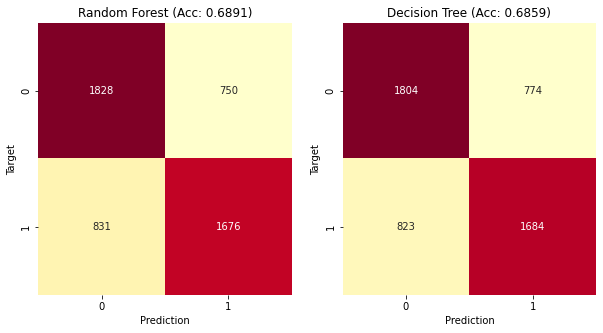

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Target_test, random_forest_prediction), annot=True, fmt="g",  cmap="YlOrRd", cbar=False)
ax.set_xlabel('Prediction')
ax.set_ylabel('Target')
ax.set_title(f"Random Forest (Acc: {random_forest_accuracy:.4f})")
ax = plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(Target_test, decision_tree_prediction), annot=True, fmt="g",  cmap="YlOrRd", cbar=False)
ax.set_xlabel('Prediction')
ax.set_ylabel('Target')
ax.set_title(f"Decision Tree (Acc: {decision_tree_accuracy:.4f})")

In [ ]:
#Porque el random forest dio los mejores resultados vemos la importancia de los atributos para este modelo
importances = list(random_forest.feature_importances_)
input_list = list(input.columns)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(input_list,importances)]
feature_importances = sorted(feature_importances, key= lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances ];

Variable: edad                 Importance: 0.38
Variable: años_edc             Importance: 0.18
Variable: estrato              Importance: 0.12
Variable: pc                   Importance: 0.1
Variable: pareja               Importance: 0.06
Variable: internet             Importance: 0.05
Variable: padres_reside_ninguno Importance: 0.05
Variable: estudiante_act       Importance: 0.02
Variable: padres_reside_madre  Importance: 0.02
Variable: padres_reside_padre y madre Importance: 0.02
Variable: sexo                 Importance: 0.0
Variable: padres_reside_padre  Importance: 0.0
Variable: etnia_Afro           Importance: 0.0
Variable: etnia_gitano         Importance: 0.0
Variable: etnia_indigena       Importance: 0.0
Variable: etnia_sin_rec_etnico Importance: 0.0


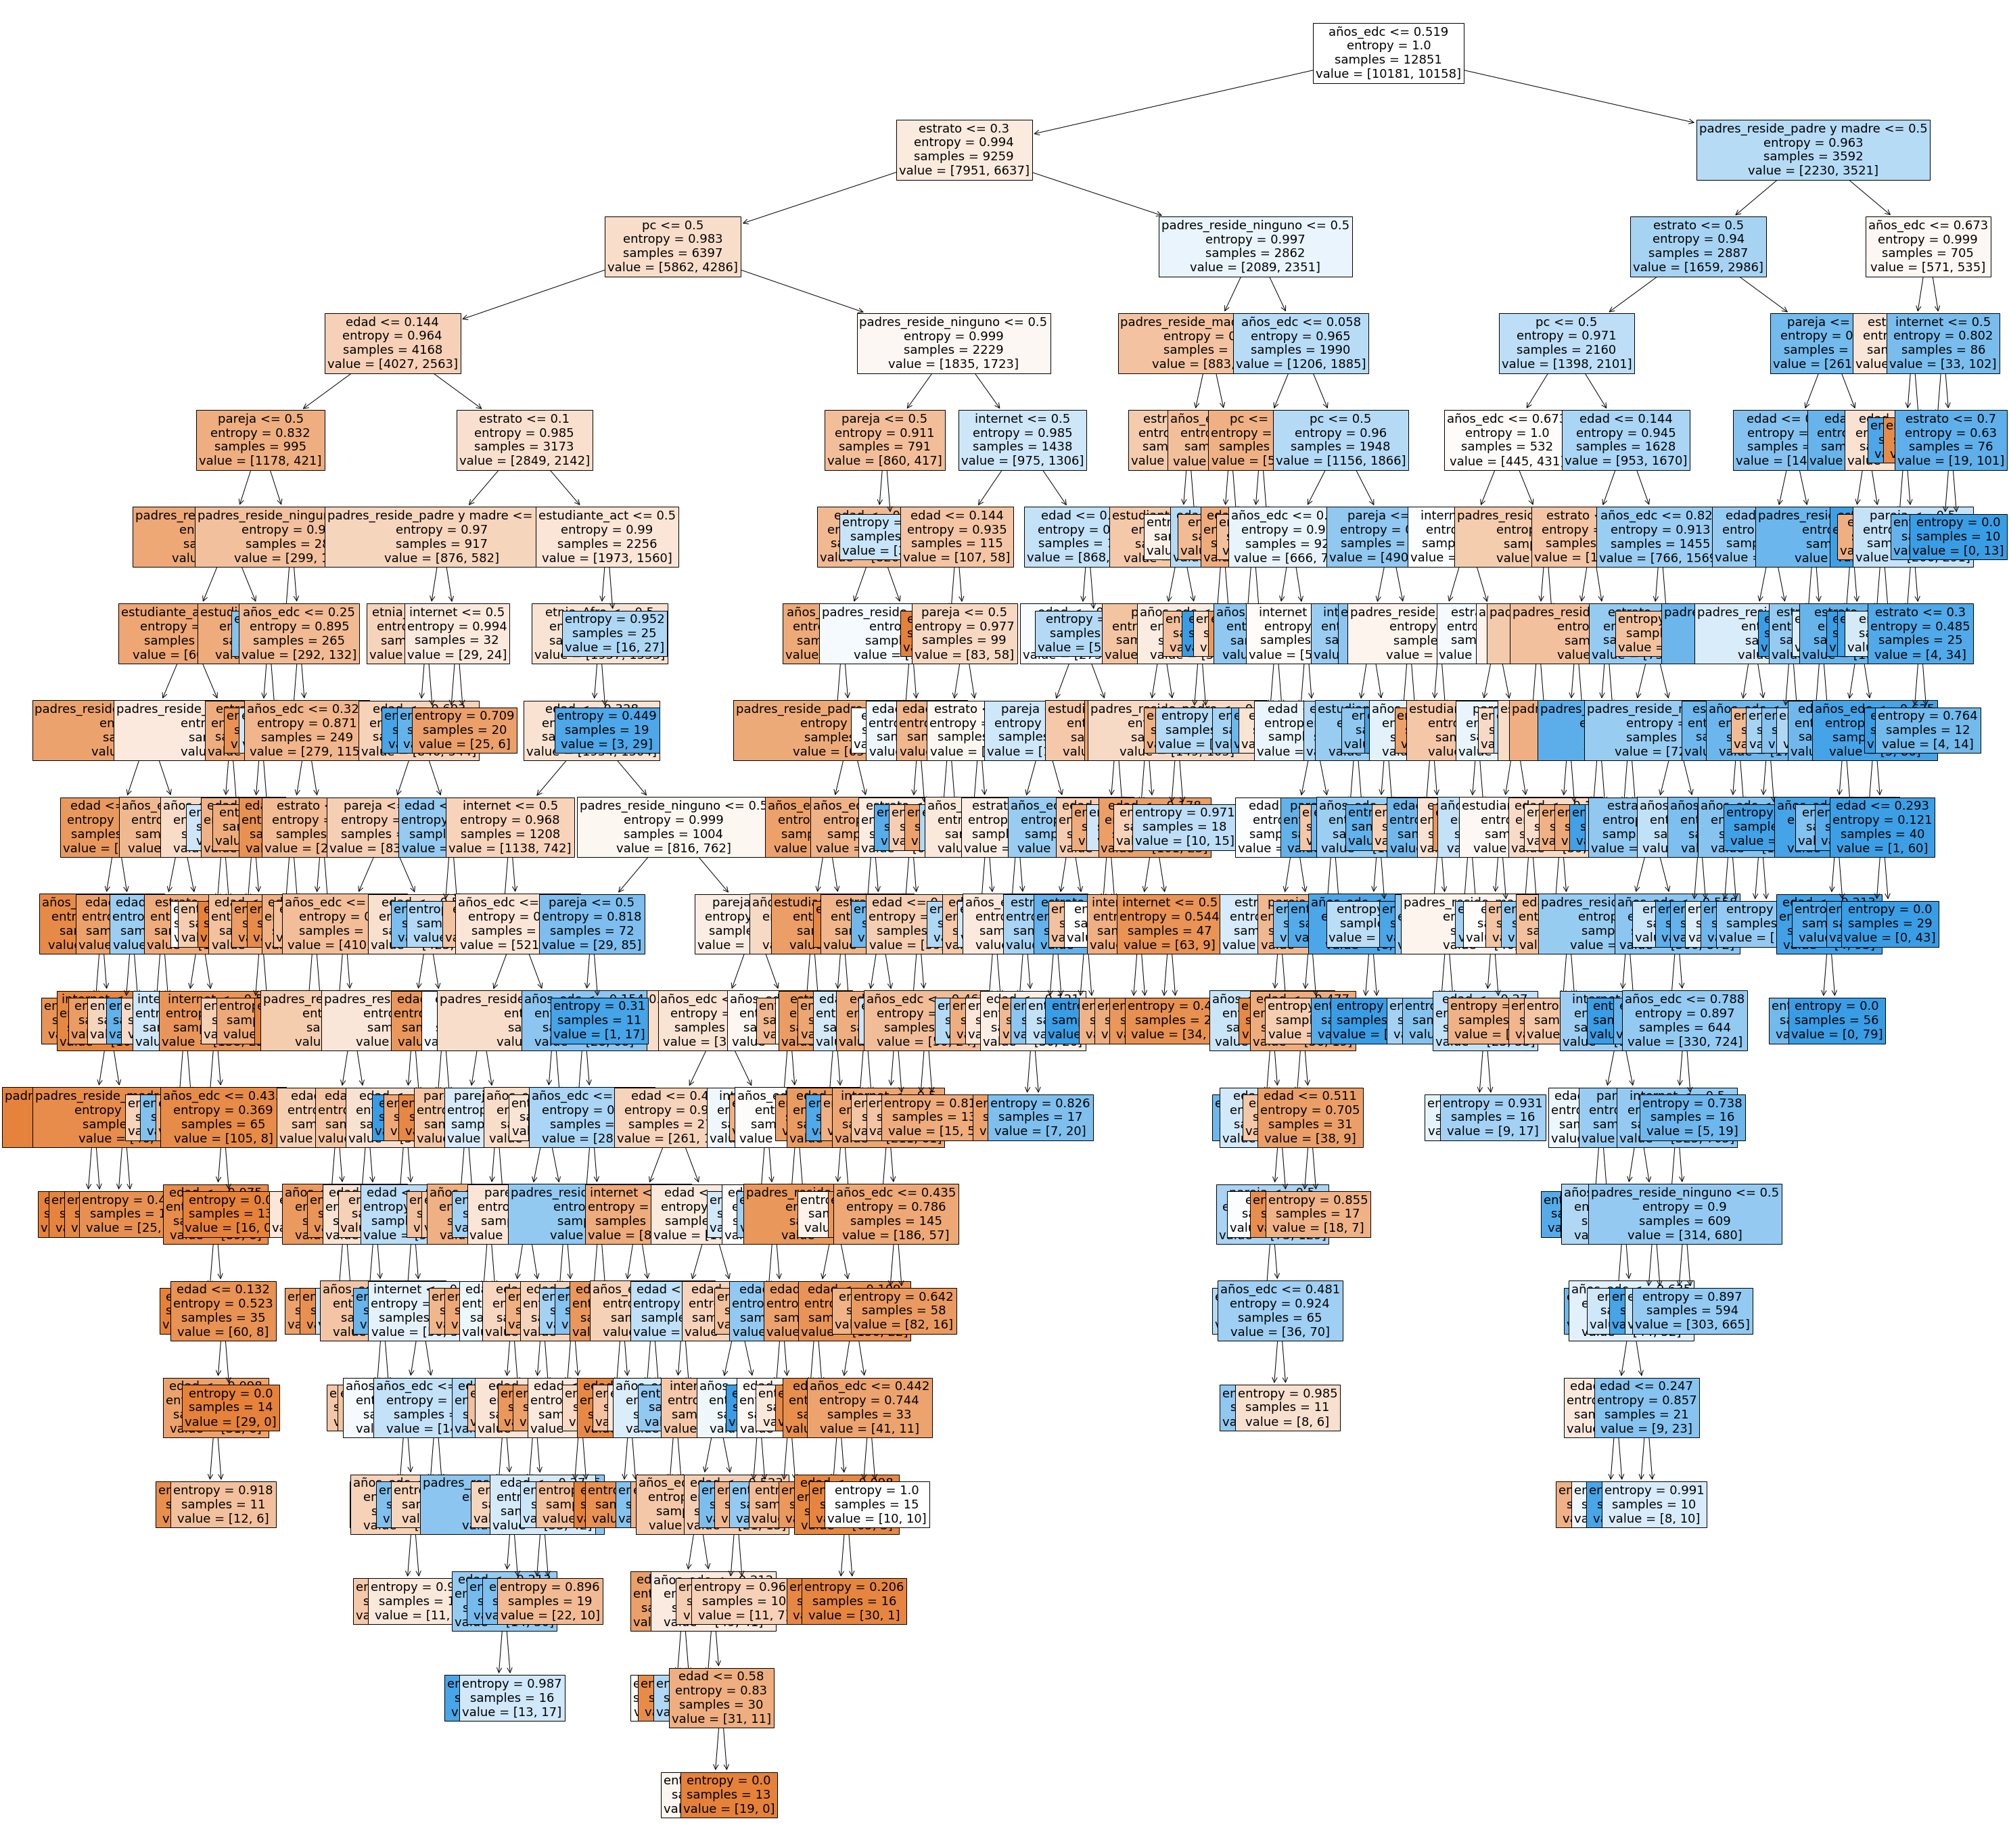

In [ ]:
plt.figure(figsize=(50,50))
_ = tree.plot_tree(random_forest.estimators_[0], feature_names=input.columns, filled=True, fontsize=18)


## **Conclusión DT**:
Al incrementar el parametro **max_depth** se obtiene mejores resultados en el entrenamiento y en la prediccion.
Sin embargo los modelos de desision_tree y random_forest no llegana  explicar mas del 70% de los casos.

Deberiamos trabajar en la poda del arbol para poder hacer mas legibles las regals con las que clasifica.

#**ESTRATEGIA PARA MEJORAR LA PREFORMANCE DEL MODELO**

# **BALANCE DE DATOS**
El problema de mejora de performance de los modelos se puede estar generando en el desbalance de datos, es decir que para el entrenamiento del modelo estamos entrenando con un set de datos que tiene mayor cantidad de casos que pertenecen a una clase que la otra. Para ello aplicaremos una tecnica de balance de datos la cual tiene su pipeline.

Fuente: [Link](https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados)

**Librerias imblearn**

[Doc Oficial: ](https://imbalanced-learn.org/stable/auto_examples/index.html)

##PREPARACION DEL SET DE DATOS

In [52]:
# Levanto el set de datos CURADO que esta guardado en drive
df_curado1 = pd.read_csv('/content/DRIVE/MyDrive/2 - CDIA/CDIA/PPT2/dataset_curado_1')
df_curado1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25424 entries, 0 to 25423
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   empleado        25424 non-null  int64  
 1   sexo            25424 non-null  int64  
 2   edad            25424 non-null  float64
 3   años_edc        25424 non-null  float64
 4   pareja          25424 non-null  int64  
 5   estudiante_act  25424 non-null  int64  
 6   estrato         25424 non-null  int64  
 7   pc              25424 non-null  int64  
 8   internet        25424 non-null  int64  
 9   etnia           25424 non-null  object 
 10  padres_reside   25424 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 2.1+ MB


In [48]:
#Realizo un One Hot Encoding para los campos ETNIA y PADRES_RESI
df_curado2 = pd.get_dummies(df_curado1 , columns=['etnia'])
df_curado2 = pd.get_dummies(df_curado2 , columns=['padres_reside'])

In [49]:
#Defino Target e Input
target = np.array(df_curado2.empleado)
input = np.array(df_curado2.drop(columns='empleado'))

In [50]:
Datos_train, Datos_test, Target_train, Target_test = train_test_split (input, target, test_size= 0.2, random_state=42)

In [51]:
#Normalizamos el dataset 
min_max_scaler = preprocessing.MinMaxScaler()
Datos_train_normalizado = min_max_scaler.fit_transform(Datos_train)
Datos_test_normalizado = min_max_scaler.fit_transform(Datos_test)

## **1) Balance desde los Parametros del modelo - Datos normalizados**
**Ajuste de Parámetros del modelo**: Consiste en ajustar parametros ó metricas del propio algoritmo para intentar equilibrar a la clase minoritaria penalizando a la clase mayoritaria durante el entrenamiento. Ejemplos con ajuste de peso en árboles, también en logisticregression tenemos el parámetro class_weight= “balanced”. 

No todos los algoritmos tienen estas posibilidades. En redes neuronales por ejemplo podríamos ajustar la métrica de Loss para que penalice a las clases mayoritarias.


In [55]:
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression

# aplicamos los parametros en los modelos de DesisionTree, Random_Forest y Logistic_Regresion

#Entrenamos los modelos con las metricas obtenidas de la grilla

random_forest_balance = RandomForestClassifier(criterion= 'gini',
                                               class_weight='balanced', 
                                               max_depth= 100, 
                                               min_samples_leaf= 10, 
                                               min_samples_split= 10, 
                                               n_estimators= 50).fit(Datos_train_normalizado, Target_train)

decision_tree_balance = tree.DecisionTreeClassifier(criterion= 'gini',
                                                    class_weight='balanced',
                                                    max_depth= 50, 
                                                    min_samples_leaf= 10, 
                                                    min_samples_split= 10).fit(Datos_train_normalizado, Target_train)

logistic_regression_balance = LogisticRegression(class_weight='balanced')
logistic_regression_balance.max_iter=130
logistic_regression_balance.fit(Datos_train_normalizado, Target_train)

# PREDICCIONES

random_forest_prediction_balance = random_forest_balance.predict(Datos_test_normalizado)
decision_tree_prediction_balance = decision_tree_balance.predict(Datos_test_normalizado)
logistic_regression_prediction_balance  = logistic_regression_balance.predict(Datos_test_normalizado)

# Score
random_forest_accuracy = accuracy_score(Target_test, random_forest_prediction_balance)
decision_tree_accuracy = accuracy_score(Target_test, decision_tree_prediction_balance)
logistic_regression_accuracy =accuracy_score(Target_test, logistic_regression_prediction_balance)




In [56]:
# SCORES
print("random_forest_accuracy = ",random_forest_accuracy)
print("decision_tree_accuracy = ",decision_tree_accuracy)
print("logistic_regression_accuracy = ",logistic_regression_accuracy)

random_forest_accuracy =  0.6822025565388398
decision_tree_accuracy =  0.6857423795476892
logistic_regression_accuracy =  0.6304818092428712


Text(0.5, 1.0, 'Decision Tree (Acc: 0.6857)')

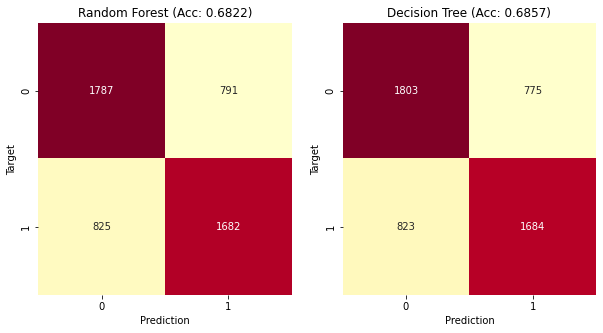

In [57]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Target_test, random_forest_prediction_balance), annot=True, fmt="g",  cmap="YlOrRd", cbar=False)
ax.set_xlabel('Prediction')
ax.set_ylabel('Target')
ax.set_title(f"Random Forest (Acc: {random_forest_accuracy:.4f})")
ax = plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(Target_test, decision_tree_prediction_balance), annot=True, fmt="g",  cmap="YlOrRd", cbar=False)
ax.set_xlabel('Prediction')
ax.set_ylabel('Target')
ax.set_title(f"Decision Tree (Acc: {decision_tree_accuracy:.4f})")
# ax = plt.subplot(1,2,2)
# sns.heatmap(confusion_matrix(Target_test, logistic_regression_prediction_balance), annot=True, fmt="g",  cmap="YlOrRd", cbar=False)
# ax.set_xlabel('Prediction')
# ax.set_ylabel('Target')
# ax.set_title(f"Logistic Regression: {logistic_regression_accuracy:.4f})")

Text(0.5, 1.0, 'Logistic Regression: 0.6305)')

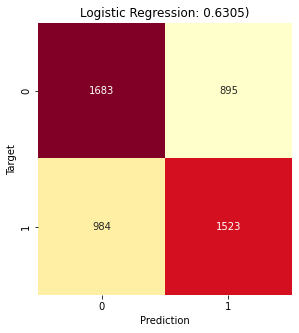

In [58]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Target_test, logistic_regression_prediction_balance), annot=True, fmt="g",  cmap="YlOrRd", cbar=False)
ax.set_xlabel('Prediction')
ax.set_ylabel('Target')
ax.set_title(f"Logistic Regression: {logistic_regression_accuracy:.4f})")

In [59]:
from sklearn.metrics import classification_report
print("## Random Forest - Metrics  ##")
print (classification_report(Target_test, random_forest_prediction_balance))
print("## Desicion Tree - Metrics  ##")
print (classification_report(Target_test, decision_tree_prediction_balance))
print("## Logistic Regression - Metrics  ##")
print (classification_report(Target_test, logistic_regression_prediction_balance))

## Random Forest - Metrics  ##
              precision    recall  f1-score   support

           0       0.68      0.69      0.69      2578
           1       0.68      0.67      0.68      2507

    accuracy                           0.68      5085
   macro avg       0.68      0.68      0.68      5085
weighted avg       0.68      0.68      0.68      5085

## Desicion Tree - Metrics  ##
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      2578
           1       0.68      0.67      0.68      2507

    accuracy                           0.69      5085
   macro avg       0.69      0.69      0.69      5085
weighted avg       0.69      0.69      0.69      5085

## Logistic Regression - Metrics  ##
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      2578
           1       0.63      0.61      0.62      2507

    accuracy                           0.63      5085
   macro avg       0.63      

##**Analisis de la estrategia 1** 
Los modelos no muestran mejor performance al balancear los datos desde el modelo con el parametro **class_weight**.


## **2) Balance de datos por SET DE DATOS - Datos Normalizados**
Estrategia: **Oversampling** de la clase minoritaria
En este caso, crearemos muestras nuevas “sintéticas” de la clase minoritaria. Usando RandomOverSampler. 

[Link Oversampling ](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

In [45]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter
# sampling_strategy = 'auto',
os =  RandomOverSampler(sampling_strategy = 'not minority', random_state=123 )
#X_train, X_test, y_train, y_test
X_train_res, y_train_res = os.fit_resample(Datos_train_normalizado, Target_train)
 
print ("Distribution before resampling {}".format(Counter(target)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

# model = run_model(X_train_res, X_test, y_train_res, y_test)
# pred_y = model.predict(X_test)
# mostrar_resultados(y_test, pred_y)

Distribution before resampling Counter({1: 12723, 0: 12701})
Distribution labels after resampling Counter({1: 10216, 0: 10123})


In [60]:
# ENTRENAMIENTO
random_forest_balance.fit(X_train_res, y_train_res)
decision_tree_balance.fit(X_train_res, y_train_res)
logistic_regression_balance.max_iter=150
logistic_regression_balance.fit(X_train_res, y_train_res)

# PREDICCIONES

# UTILIZARE LOS BALANCE2 para la salidas
random_forest_prediction_balance2 = random_forest_balance.predict(Datos_test_normalizado)
decision_tree_prediction_balance2 = decision_tree_balance.predict(Datos_test_normalizado)
logistic_regression_prediction_balance2  = logistic_regression_balance.predict(Datos_test_normalizado)

# Score
random_forest_accuracy = accuracy_score(Target_test, random_forest_prediction_balance2)
decision_tree_accuracy = accuracy_score(Target_test, decision_tree_prediction_balance2)
logistic_regression_accuracy =accuracy_score(Target_test, logistic_regression_prediction_balance2)

In [61]:
print ("random_forest \n",classification_report(Target_test, random_forest_prediction_balance2))
print ("decision_tree \n",classification_report(Target_test, decision_tree_prediction_balance2))
print ("logistic_regression \n",classification_report(Target_test, logistic_regression_prediction_balance2))

random_forest 
               precision    recall  f1-score   support

           0       0.66      0.47      0.55      2578
           1       0.58      0.75      0.65      2507

    accuracy                           0.61      5085
   macro avg       0.62      0.61      0.60      5085
weighted avg       0.62      0.61      0.60      5085

decision_tree 
               precision    recall  f1-score   support

           0       0.64      0.58      0.61      2578
           1       0.61      0.67      0.63      2507

    accuracy                           0.62      5085
   macro avg       0.62      0.62      0.62      5085
weighted avg       0.62      0.62      0.62      5085

logistic_regression 
               precision    recall  f1-score   support

           0       0.67      0.23      0.34      2578
           1       0.53      0.89      0.66      2507

    accuracy                           0.55      5085
   macro avg       0.60      0.56      0.50      5085
weighted avg       0

##**Analisis de la Estrategia 2**

## **3) Balance de datos por SET DE DATOS - Datos sin Normalizar**

In [62]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter
# sampling_strategy = 'auto',
os =  RandomOverSampler(sampling_strategy = 'not minority', random_state=123 )
# APLICO EL RandomOverSampler al set de datos SIN NORMALIZAR (X_train, y_train)
X_train_res, y_train_res = os.fit_resample(Datos_train, Target_train)
 
print ("Distribution before resampling {}".format(Counter(target)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

# model = run_model(X_train_res, X_test, y_train_res, y_test)
# pred_y = model.predict(X_test)
# mostrar_resultados(y_test, pred_y)

Distribution before resampling Counter({1: 12723, 0: 12701})
Distribution labels after resampling Counter({1: 10216, 0: 10123})


In [63]:
from sklearn.utils import class_weight
# aplicamos los parametros en los modelos de DesisionTree, Random_Forest y Logistic_Regresion

#Entrenamos los modelos con las metricas obtenidas de la grilla

random_forest_balance2 = RandomForestClassifier(criterion= 'gini',
                                               # class_weight='balanced', 
                                               max_depth= 100, 
                                               min_samples_leaf= 10, 
                                               min_samples_split= 10, 
                                               n_estimators= 50).fit(X_train_res, y_train_res)

decision_tree_balance2 = tree.DecisionTreeClassifier(criterion= 'gini',
                                                    # class_weight='balanced',
                                                    max_depth= 50, 
                                                    min_samples_leaf= 10, 
                                                    min_samples_split= 10).fit(X_train_res, y_train_res)

logistic_regression_balance2 = LogisticRegression()
logistic_regression_balance2.max_iter=130
logistic_regression_balance2.fit(X_train_res, y_train_res)

# PREDICCIONES

random_forest_prediction_balance3 = random_forest_balance2.predict(Datos_test)
decision_tree_prediction_balance3 = decision_tree_balance2.predict(Datos_test)
logistic_regression_prediction_balance3  = logistic_regression_balance2.predict(Datos_test)

# Score
random_forest_accuracy = accuracy_score(Target_test, random_forest_prediction_balance3)
decision_tree_accuracy = accuracy_score(Target_test, decision_tree_prediction_balance3)
logistic_regression_accuracy =accuracy_score(Target_test, logistic_regression_prediction_balance3)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [64]:
print ("random_forest \n",classification_report(Target_test, random_forest_prediction_balance2))
print ("decision_tree \n",classification_report(Target_test, decision_tree_prediction_balance2))
print ("logistic_regression \n",classification_report(Target_test, logistic_regression_prediction_balance2))

random_forest 
               precision    recall  f1-score   support

           0       0.66      0.47      0.55      2578
           1       0.58      0.75      0.65      2507

    accuracy                           0.61      5085
   macro avg       0.62      0.61      0.60      5085
weighted avg       0.62      0.61      0.60      5085

decision_tree 
               precision    recall  f1-score   support

           0       0.64      0.58      0.61      2578
           1       0.61      0.67      0.63      2507

    accuracy                           0.62      5085
   macro avg       0.62      0.62      0.62      5085
weighted avg       0.62      0.62      0.62      5085

logistic_regression 
               precision    recall  f1-score   support

           0       0.67      0.23      0.34      2578
           1       0.53      0.89      0.66      2507

    accuracy                           0.55      5085
   macro avg       0.60      0.56      0.50      5085
weighted avg       0

## **Analisis de la Estrategia 3**
Al aplicar un balance de datos conseguimos una mejor performans del los modelos.
De los 3 modelos entrenados el que tiene mejor performans es el *decision_tree* que alcanza un *accuracy = 0.69* explicando el 69% del set de datos. 

El pipe line quedaria de la siguiente manera.

Datos: Sin normalizar, Balanceado en el SET DE DATOS.

Modelo: Decision_Tree con los siguientes criterios:
  criterion= 'gini',
  max_depth= 50, 
  min_samples_leaf= 10, 
  min_samples_split= 10

## **4) Estrategia: Combinamos resampling con Smote-Tomek**

Ahora probaremos una técnica muy usada que consiste en aplicar en simultáneo un algoritmo de subsampling y otro de oversampling a la vez al dataset.

En este caso usaremos **SMOTE para oversampling:** 
Genera nuevas instancias de la clase minoritaria
interpolando los valores de las instancias minoritarias más cercanas a una dada.
 
busca puntos vecinos cercanos y agrega puntos “en linea recta” entre ellos. 


Y usaremos **Tomek para undersampling**

Elimina sólo instancias de la clase mayoritaria que
sean redundantes o que se encuentren muy cerca de instancias de la
clase minoritaria

quita los de distinta clase que sean empleado y desempleado.

[Doc. Smote-Tomek ](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html#imblearn.combine.SMOTETomek.fit_resample)

In [ ]:
#DATOS SIN NORMALIZAR
from imblearn.combine import SMOTETomek
from collections import Counter

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_resample(Datos_train, Target_train)
 
print ("Distribution before resampling {}".format(Counter(Target_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))
 
# model = run_model(X_train_res, X_test, y_train_res, y_test)
# pred_y = model.predict(X_test)
# mostrar_resultados(y_test, pred_y)

Distribution before resampling Counter({1: 10216, 0: 10123})
Distribution after resampling Counter({1: 10194, 0: 10194})


In [ ]:
### BUSQUEDA DE PARAMETROS EN GRILLA --> sobre set balanceado
#Generamos los parametros para hacer una busqueda en grilla del mejor modelo

model_params = {
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10, 25, 50],        #numero de arboles en el bosque
            'max_depth':[3, 5,10,50,100,150],             #profundidad maxima del arbol
            'min_samples_split':[10, 50,100],  #numero minimo de muestras requeridas para dividir un nodo interno
            'min_samples_leaf':[10, 50,100],   #numero minimo de muestras requeridas para estar en un nodo hoja
            'criterion':['gini', 'entropy']
        }
    },
  'decision tree':{
      'model':tree.DecisionTreeClassifier(),
      'params':{
          'max_depth':[3, 5,10,50,100,150],
          'min_samples_split':[10, 50,100],
          'min_samples_leaf':[10, 50,100],
          'criterion':['gini','entropy']
      }
  }
}

In [ ]:
#Hacemos la busqueda en grilla
score = []

for model_name, mp in model_params.items():

  clf=GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
  clf.fit(X_train_res, y_train_res)
  
  score.append({
      'model':model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

In [ ]:
# RESULTADO 
#Vemos cuales fueron los mejores resultados de cada modelo y seleccionamos el mejor
df_score = pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])
print(df_score['model'][0]," ",df_score['best_score'][0]," ",df_score['best_params'][0])
print(df_score['model'][1]," ",df_score['best_score'][1]," ",df_score['best_params'][1])
# print(df_score['best_params'][1])


random_forest   0.6828036099666471   {'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}
decision tree   0.7058073376495978   {'criterion': 'gini', 'max_depth': 100, 'min_samples_leaf': 10, 'min_samples_split': 10}


In [ ]:
#INSTANCIA DEL MODELO CON PARAMETROS OPTIMIZADOS + ENTRENAMIENTO + SCORE
from sklearn.utils import class_weight
# aplicamos los parametros en los modelos de DesisionTree, Random_Forest y Logistic_Regresion

#Entrenamos los modelos con las metricas obtenidas de la grilla

random_forest_balance3 = RandomForestClassifier(criterion= 'entropy',
                                               # class_weight='balanced', 
                                               max_depth= 100, 
                                               min_samples_leaf= 10, 
                                               min_samples_split= 10, 
                                               n_estimators= 50).fit(X_train_res, y_train_res)

decision_tree_balance3 = tree.DecisionTreeClassifier(criterion= 'gini',
                                                    # class_weight='balanced',
                                                    max_depth= 150, 
                                                    min_samples_leaf= 10, 
                                                    min_samples_split= 10).fit(X_train_res, y_train_res)

logistic_regression_balance3 = LogisticRegression()
logistic_regression_balance3.max_iter=200
logistic_regression_balance3.fit(X_train_res, y_train_res)

# PREDICCIONES

random_forest_prediction_balance3 = random_forest_balance3.predict(Datos_test)
decision_tree_prediction_balance3 = decision_tree_balance3.predict(Datos_test)
logistic_regression_prediction_balance3  = logistic_regression_balance3.predict(Datos_test)

# Score
random_forest_accuracy = accuracy_score(Target_test, random_forest_prediction_balance3)
decision_tree_accuracy = accuracy_score(Target_test, decision_tree_prediction_balance3)
logistic_regression_accuracy =accuracy_score(Target_test, logistic_regression_prediction_balance3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print ("random_forest \n",classification_report(Target_test, random_forest_prediction_balance3))
print ("decision_tree \n",classification_report(Target_test, decision_tree_prediction_balance3))
print ("logistic_regression \n",classification_report(Target_test, logistic_regression_prediction_balance3))

random_forest 
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      2578
           1       0.70      0.66      0.68      2507

    accuracy                           0.69      5085
   macro avg       0.70      0.69      0.69      5085
weighted avg       0.70      0.69      0.69      5085

decision_tree 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      2578
           1       0.75      0.70      0.72      2507

    accuracy                           0.74      5085
   macro avg       0.74      0.74      0.74      5085
weighted avg       0.74      0.74      0.74      5085

logistic_regression 
               precision    recall  f1-score   support

           0       0.63      0.65      0.64      2578
           1       0.63      0.61      0.62      2507

    accuracy                           0.63      5085
   macro avg       0.63      0.63      0.63      5085
weighted avg       0

## **Analisis de la Estrategia 4**

El modelo que mejor se adapta al set de datos es el de DESISION TREE alcanzando un **Accuracy de 0.74** con la siguiente parametrizacion:

* Balance de datos en el set de datos
* Entrenamiento sin normalizacion de los predictores.

**decision_tree** 

               precision    recall  f1-score   support

           0       0.72      0.78      0.75      2578
           1       0.76      0.69      0.72      2507

    accuracy                           0.74      5085
    



#**CONCLUSIÓN FINAL**
En el desarrollo del trabajo se implementaron tres modelos de clasificación y sus métricas fueron las siguientes:

- Regresión Logisitica: 63%

- Máquina soporte vector: 62,7%

- Árbol de desición con Random Forest: 68,6%

La técnica de validación cruzada, herramienta utilizada en etapas de evaluacion del modelo, fue incluida durante el desarrollo del mismo.

En pos de una mejor performance 

- Implementamos el modelo sobre otro data set, que sabemos que funciona, para asegurarnos que el problema no sea el algoritmo y el modelo nos arrojó metricas cercanas al 99%.
- Trabajamos con el balance de los datos. Con esta estrategia pudimos obtener una leve mejora, su metrica final fue la siguiente:
   
**DECISION TREE: 74%  con Balance de datos en el set de datos (combinando resampling con Smote-Tomek) y entrenamiento sin normalizacion de los predictores**

Pensando en este ultimo resultado ¿que significa que el set de datos esté balanceado? ¿50% de empleados y 50% de desempleados? ¿Sería factible usar el modelo en paises o regiones donde esta situacion no sea la realidad? Teniendo esto ultimo en cuenta, una nueva idea para implementar a futuro podria ser analizar en profundidad la correlacion entre las variables input (atributos) y trabajar solo con aquellas que aporten informacion relevante. 

Finalizamos el trabajo en esta instancia, pero dejamos abierta la idea y las ganas de trabajar para encontrar una respuesta que satisfaga mejor el objetivo planteado y para el que fue creado el modelo.  


